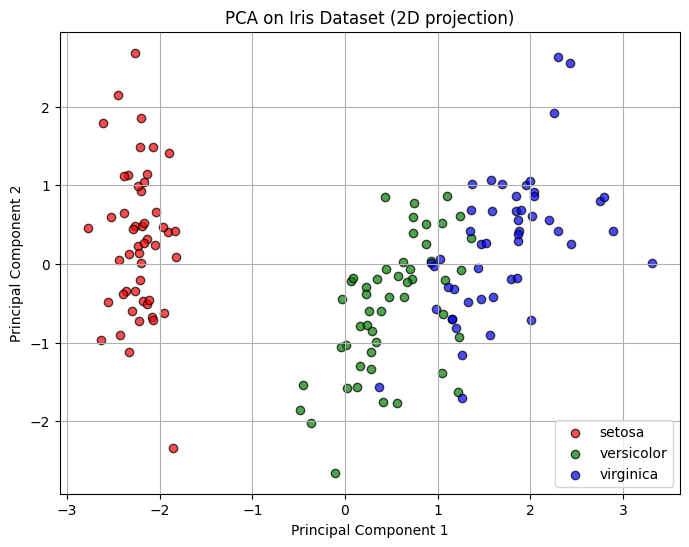

In [4]:
# hands-on code and full explanations in comments. We'll use the Iris dataset 

# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Load the Iris dataset
iris = load_iris()
X = iris.data            # The feature matrix (150 samples, 4 features)
y = iris.target          # Class labels (0 = setosa, 1 = versicolor, 2 = virginica)

# 3. Standardize the features
# PCA is sensitive to scale, so we standardize to mean=0 and std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA to reduce dimensions from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Visualize the PCA result in a 2D scatter plot
# We'll color points by their class (species)
plt.figure(figsize=(8, 6))

# Create a scatter plot with class-based coloring
for label, color, name in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                color=color, label=name, alpha=0.7, edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset (2D projection)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
##  evaluation and experimentation on PCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Helper function to run PCA + classifier and report performance
def evaluate_pca(n_components):
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    
    pipeline.fit(X_train, y_train)
    acc = pipeline.score(X_test, y_test)
    
    # Print how much variance is explained by the chosen components
    pca_model = pipeline.named_steps['pca']
    print(f"\nPCA with {n_components} components:")
    print(f"  Explained Variance Ratio: {pca_model.explained_variance_ratio_}")
    print(f"  Cumulative Variance: {sum(pca_model.explained_variance_ratio_):.2f}")
    print(f"  Accuracy: {acc:.3f}")

# Try different numbers of components
evaluate_pca(n_components=2)
evaluate_pca(n_components=3)
evaluate_pca(n_components=4)  # All features = full info (no reduction)



PCA with 2 components:
  Explained Variance Ratio: [0.71279293 0.23836264]
  Cumulative Variance: 0.95
  Accuracy: 0.911

PCA with 3 components:
  Explained Variance Ratio: [0.71279293 0.23836264 0.04362428]
  Cumulative Variance: 0.99
  Accuracy: 1.000

PCA with 4 components:
  Explained Variance Ratio: [0.71279293 0.23836264 0.04362428 0.00522015]
  Cumulative Variance: 1.00
  Accuracy: 1.000
